In [1]:
import numpy as np
from LinReg import LinReg
import random
import configparser
from Ga import Ga
import matplotlib.pyplot as plt

In [2]:
def bitstring2number(bitstring):
    l = bitstring.dot(2**np.arange(bitstring.size)[::-1])
    return l*2**(7-len(bitstring))

In [3]:
def unit_test_bitstring2number():
    print(bitstring2number(np.array([1,0,1])) == 5*2**(7-3))

In [4]:
unit_test_bitstring2number()

True


In [5]:
def fitness_for_sinus(bitstring):
    x = bitstring2number(bitstring)
    return np.sin(x)

In [6]:
def unit_test_fitness_for_sinus():
    x = bitstring2number(np.array([1,0,1]))
    print(np.sin(x) == np.sin(5*2**(7-3)))

In [7]:
unit_test_fitness_for_sinus()

True


# Read the config file

In [8]:
config = configparser.ConfigParser()
config.read('config.ini')

['config.ini']

# e) SGA

In [9]:
sga_config = config['SGA_SINUS']

number_of_individuals = int(sga_config['number_of_individuals'])
number_of_cycle = int(sga_config['number_of_cycle'])
bitstring_lentgh = int(sga_config['bitstring_lentgh'])

crossover_type = sga_config['crossover_type']
crossover_rate = sga_config['crossover_rate']
mutation_type = sga_config['mutation_type']
mutation_rate = sga_config['mutation_rate']
selection_type = sga_config['selection_type']
fitness_fonction = sga_config['fitness_fonction']

In [11]:
sga =Ga(crossover_type=crossover_type,crossover_rate =crossover_rate, mutation_type=mutation_type,selection_type=selection_type,fitness_fonction=fitness_fonction)

sga_pop, sga_entropy= sga.run(number_of_individuals=number_of_individuals,crossover_rate=crossover_rate, number_of_cycle=number_of_cycle
                    ,bitstring_length=bitstring_lentgh)

TypeError: run() got an unexpected keyword argument 'crossover_rate'

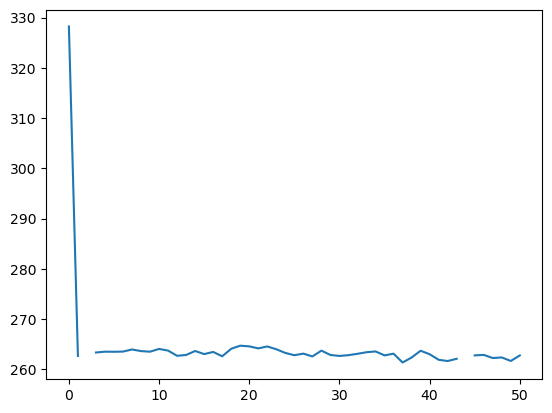

In [ ]:
plt.plot(sga_entropy)
plt.show()

In [ ]:
x_sga_pop = []
y_sga_pop = []
for individual in sga_pop:
    x_sga_pop.append(bitstring2number(individual))
    y_sga_pop.append(fitness_for_sinus(individual))

NameError: name 'x_sga_pop' is not defined

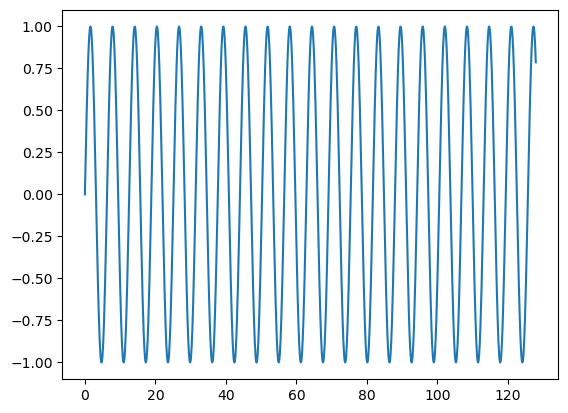

In [ ]:
x = np.arange(0,128,0.1)
y = np.sin(x)

plt.plot(x,y)
plt.plot(x_sga_pop,y_sga_pop,'bo')

# f) Niching

In [ ]:
sga =Ga(crossover_type=crossover_type,mutation_type=mutation_type,selection_type=selection_type,fitness_fonction=fitness_fonction,interval='5 10',
        penalty_rate='0.1')

sga_pop, sga_entropy= sga.run(number_of_individuals=number_of_individuals,number_of_parents=number_of_parents, number_of_cycle=number_of_cycle
                    ,bitstring_length=bitstring_lentgh)

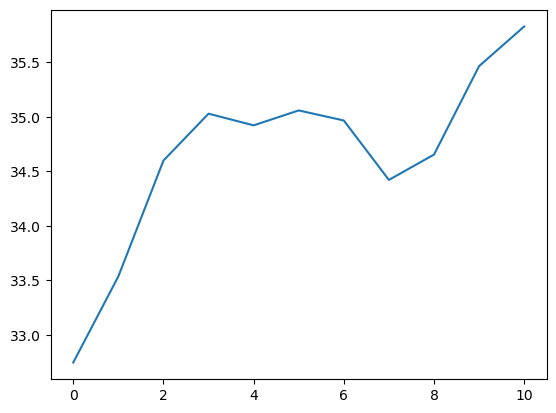

In [ ]:
plt.plot(sga_entropy)
plt.show()

In [ ]:
x_sga_pop = []
y_sga_pop = []
for individual in sga_pop:
    x_sga_pop.append(bitstring2number(individual))
    y_sga_pop.append(fitness_for_sinus(individual))

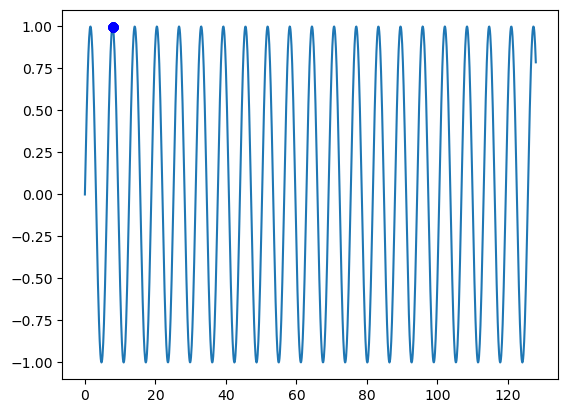

In [ ]:
x = np.arange(0,128,0.1)
y = np.sin(x)

plt.plot(x,y)
plt.plot(x_sga_pop,y_sga_pop,'bo')

# g) Dataset

In [ ]:
dataset=np.loadtxt(open("dataset.txt", "rb"), delimiter=",")
X=dataset[:,:-1]
Y=dataset[:,-1]

lR=LinReg()

In [ ]:
def fitness_for_data_case(bitstring):
    bitstring = np.array(bitstring)

    x_filtered=lR.get_columns(X,bitstring)
    return lR.get_fitness(x_filtered, Y)

In [ ]:
sga_config = config['SGA_DATASET']

number_of_individuals = int(sga_config['number_of_individuals'])
number_of_cycle = int(sga_config['number_of_cycle'])
number_of_parents = int(sga_config['number_of_parents'])
bitstring_lentgh = int(sga_config['bitstring_lentgh'])

crossover_type = sga_config['crossover_type']
mutation_type = sga_config['mutation_type']
selection_type = sga_config['selection_type']
fitness_fonction = sga_config['fitness_fonction']

In [ ]:
sga =Ga(crossover_type=crossover_type,mutation_type=mutation_type,selection_type=selection_type,fitness_fonction=fitness_fonction)

sga_pop, sga_entropy= sga.run(number_of_individuals=number_of_individuals,number_of_parents=number_of_parents, number_of_cycle=number_of_cycle
                    ,bitstring_length=bitstring_lentgh)

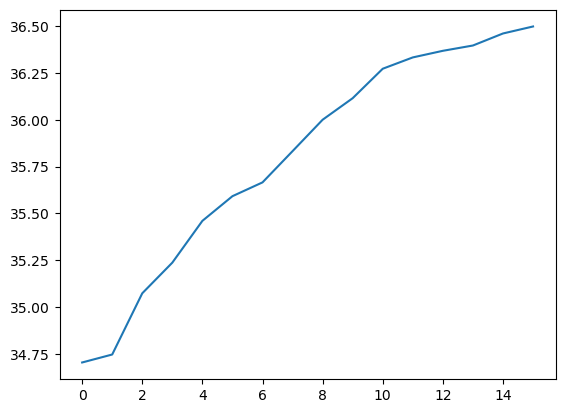

In [ ]:
plt.plot(sga_entropy)
plt.show()

In [ ]:
fitness_for_data_case(sga_pop[-1])

0.1528342543071926

# Crowding

In [ ]:
crowding_config = config['CROWDING']

crossover_type = crowding_config['crossover_type']
mutation_type = crowding_config['mutation_type']
selection_type = crowding_config['selection_type']
compete_type = crowding_config['compete_type']
fitness_fonction = crowding_config['fitness_fonction']

In [ ]:
crowding =Ga(crossover_type=crossover_type,mutation_type=mutation_type,selection_type=selection_type,fitness_fonction=fitness_fonction,
                crowding_option=True, compete_type=compete_type,interval='0 128',penalty_rate='0')

crowding_pop,crowding_entropy = crowding.run(number_of_individuals=number_of_individuals,number_of_parents=number_of_parents, number_of_cycle=number_of_cycle
                    ,bitstring_length=bitstring_lentgh)

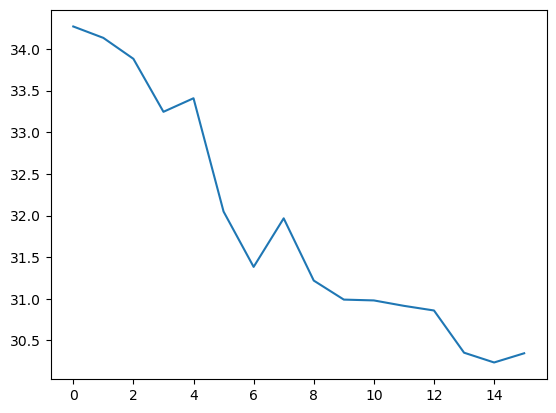

In [ ]:
plt.plot(crowding_entropy)
plt.show()

In [ ]:
x_crowding_pop = []
y_crowding_pop = []
for individual in crowding_pop:
    x_crowding_pop.append(bitstring2number(individual))
    y_crowding_pop.append(fitness_for_sinus(individual))

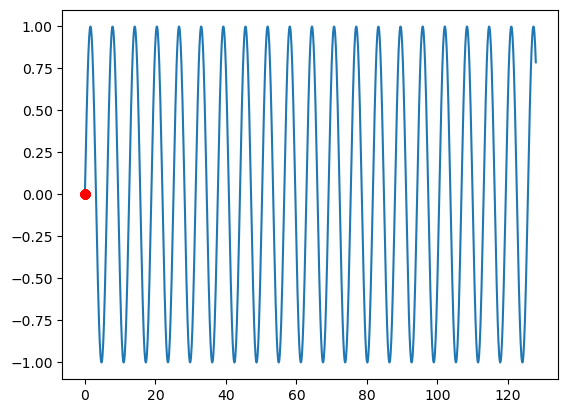

In [ ]:
x = np.arange(0,128,0.1)
y = np.sin(x)

plt.plot(x,y)
plt.plot(x_crowding_pop,y_crowding_pop,'ro')

plt.show()

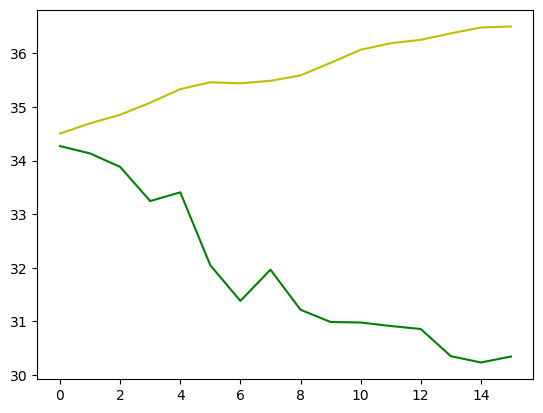

In [ ]:
plt.plot(sga_entropy,'y')
plt.plot(crowding_entropy,'g')
plt.show()